In [3]:
using DataFrames, Gadfly, LowRankModels

INFO: Recompiling stale cache file /Users/rainyniu/.julia/lib/v0.5/LowRankModels.ji for module LowRankModels.


In [162]:
training = readtable("train.csv")
training[:Month] = DateTime(training[:Month],"yyyy-mm-ddTHH:MM:SS");

In [163]:
by(training,[:Text_General_Code],df -> sum(df[:x1]))

,Text_General_Code,x1
1,Aggravated_Assault,55506
2,All_Other_Offenses,239079
3,Arson,3366
4,Burglary,68948
5,Disorderly_Conduct,24873
6,Drinking_Violation,37668
7,Embezzlement,2661
8,Forgery_Counterfeiting,3577
9,Fraud,57755
10,Gambling_Violations,657


In [153]:
data  = training[:,[:Theft,:All_Other_Offenses,:Other_Assaults,
        :Vandalism,:Narcotic,:Burglary,:Fraud,:Retrieving,:Robbery,:Aggravated_Assault,
        :Driving_Under_The_Influcence,:Disorderly_Conduct,:Weapon_Violations,
        :Other_Sex_Offenses,:Prostitution,:Rape,:Drinking_Violation,:Vagrancy_Loitering,:Arson,
        :Forgery_Counterfeiting,:Embezzlement,:Homicide,:Offenses_Against_Family_Children,
        :Gambling_Violations,:Receiving_Stolen_Property,:x1 ]]

,Theft,All_Other_Offenses,Other_Assaults,Vandalism,Narcotic,Burglary,Fraud,Retrieving,Robbery,Aggravated_Assault,Driving_Under_The_Influcence,Disorderly_Conduct,Weapon_Violations,Other_Sex_Offenses,Prostitution,Rape,Drinking_Violation,Vagrancy_Loitering,Arson,Forgery_Counterfeiting,Embezzlement,Homicide,Offenses_Against_Family_Children,Gambling_Violations,Receiving_Stolen_Property,x1
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4252
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,44
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,425
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,381
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,40
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,68
7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,777
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,9
9,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1195
10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,20


In [44]:
glrm = GLRM(data, QuadLoss(), ZeroReg(), ZeroReg(), 2);

In [45]:
X,W,ch = fit!(glrm)

Fitting GLRM
Iteration 10: objective value = 2.385453057626378e9


(
[-38.9596 -226.142 … -74.2824 -9.07326; 39.6006 229.786 … 75.6304 9.20694],

[-0.399685 -0.556847 … -0.574689 -1.28768; 0.875021 -0.241059 … 0.653567 1.25903],

LowRankModels.ConvergenceHistory("ProxGradGLRM",[2.76195e9,2.60482e9,2.55248e9,2.42131e9,2.40476e9,2.39011e9,2.38687e9,2.38594e9,2.38562e9,2.38549e9,2.38545e9,2.38523e9],Float64[],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.240525,0.335861,0.437161,0.5373,0.636588,0.72661,0.82089,0.911726,1.0032,1.09808,1.21333],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],0))

In [46]:
X

2×1799 Array{Float64,2}:
 -38.9596  -226.142  -2.31829  -48.2487  …  -2.17149  -74.2824  -9.07326
  39.6006   229.786   2.37269   48.9122      2.17731   75.6304   9.20694

In [47]:
W

2×26 Array{Float64,2}:
 -0.399685  -0.556847  -2.02669  1.09898  …  -0.320088  -0.574689  -1.28768
  0.875021  -0.241059  -1.34608  1.48681     -0.486154   0.653567   1.25903

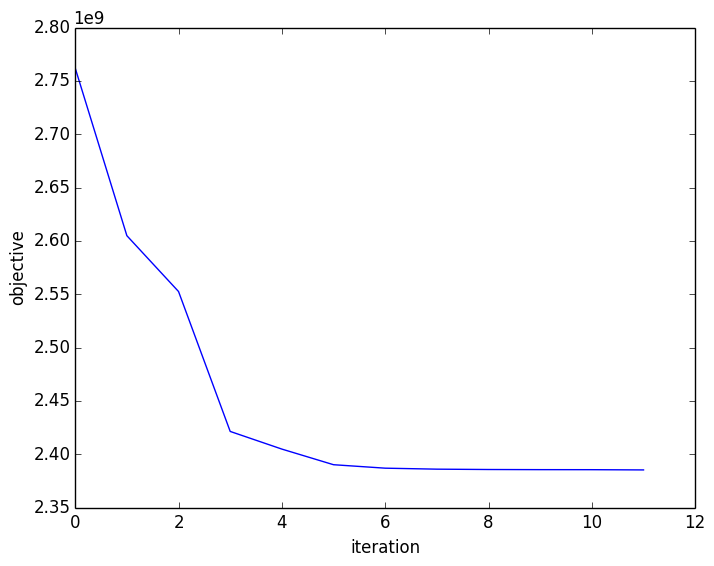

PyObject <matplotlib.text.Text object at 0x31d6f7090>

In [48]:
PyPlot.plot(ch.objective)
xlabel("iteration")
ylabel("objective")

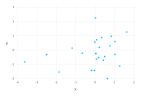

In [27]:
Gadfly.plot(X, x=W[1,:], y=W[2,:], Geom.point)

In [65]:
glrm1 = GLRM(data, QuadLoss(), ZeroReg(), ZeroReg(), 1);

In [66]:
X1,W1,ch1 = fit!(glrm1)

Fitting GLRM
Iteration 10: objective value = 1.560476709985871e8


(
[5.38115 31.2968 … 9.4435 1.09684],

[0.0585832 0.121076 … -0.00841206 163.868],

LowRankModels.ConvergenceHistory("ProxGradGLRM",[2.76204e9,2.7606e9,1.51138e9,1.03599e9,8.75078e8,8.75078e8,4.81872e8,3.3142e8,2.80492e8,2.80492e8,1.56048e8,1.08432e8,9.23136e7,9.23136e7],Float64[],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],[0.0,0.242682,0.35333,0.683399,0.796864,0.905977,1.01774,1.22943,1.4409,1.6791,1.8071,1.91736,2.01591,2.16288],[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],0))

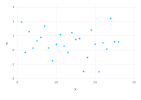

In [28]:
Gadfly.plot(X1, x = 1:26, y=W1[1,:], Geom.point)

In [50]:
rank(convert(Array, data))

26

In [51]:
n,d = size(training)

(1799,48)

In [165]:
sample = rand(1:n, 900);
fitdata = training[sample,:]
testdata = training[setdiff(1:n,sample),:];

In [79]:
columnNames = convert(Array{Symbol},["Text_General_Code","w1","w2","w3","w4","w5",
    "w6","w7","w8","w9","w10","w11","w12","w13","w14","w15"])

16-element Array{Symbol,1}:
 :Text_General_Code
 :w1               
 :w2               
 :w3               
 :w4               
 :w5               
 :w6               
 :w7               
 :w8               
 :w9               
 :w10              
 :w11              
 :w12              
 :w13              
 :w14              
 :w15              

In [185]:
k = 15
m = size(fitdata)[1]
m1 = size(testdata)[1]
errorMat = zeros(k,2)
testsetErr = zeros(k,2)
for i = 1:k
    slimdata  = fitdata[:,[:Theft,:All_Other_Offenses,:Other_Assaults,
        :Vandalism,:Narcotic,:Burglary,:Fraud,:Retrieving,:Robbery,:Aggravated_Assault,
        :Driving_Under_The_Influcence,:Disorderly_Conduct,:Weapon_Violations,
        :Other_Sex_Offenses,:Prostitution,:Rape,:Drinking_Violation,:Vagrancy_Loitering,:Arson,
        :Forgery_Counterfeiting,:Embezzlement,:Homicide,:Offenses_Against_Family_Children,
        :Gambling_Violations,:Receiving_Stolen_Property,:x1 ]]
    glrm = GLRM(slimdata, QuadLoss(), ZeroReg(), ZeroReg(), i);
    glrm1 = GLRM(slimdata, HuberLoss(), ZeroReg(), ZeroReg(), i);
    X,W,ch = fit!(glrm);
    X1,W1,ch1 = fit!(glrm1);
    W = [crimeNames W'][1:25,:]
    W1 = [crimeNames W1'][1:25,:]
    W = convert(DataFrame,W)
    W1 = convert(DataFrame,W1)
    names!(W,columnNames[1:(i+1)])
    #@show W
    names!(W1,columnNames[1:(i+1)])
    train = join(fitdata, W, on = :Text_General_Code, kind = :left)
    train1 = join(fitdata, W1, on = :Text_General_Code, kind = :left)
    test = join(testdata, W, on = :Text_General_Code, kind = :left)
    test1 = join(testdata, W1, on = :Text_General_Code, kind = :left)
    x = train[Symbol("w1")].data
    xtest = test[Symbol("w1")].data
    for j = 2:i
        x = [x train[Symbol("w$j")].data]
        xtest = [xtest test[Symbol("w$j")].data]
    end
    x1 = train1[Symbol("w1")].data
    xtest1 = test1[Symbol("w1")].data
    for j = 2:i
        x1 = [x1 train1[Symbol("w$j")].data]
        xtest1 = [xtest1 test1[Symbol("w$j")].data]
    end
    #@show size(x)
    X = convert(Array{Float64,2},[train[:Temperature_Avg].data ones(m) x])
    Xtest = convert(Array{Float64,2},[test[:Temperature_Avg].data ones(m1) xtest])
    #@show X
    X1 = convert(Array{Float64,2},[train1[:Temperature_Avg].data ones(m) x1])
    Xtest1 = convert(Array{Float64,2},[test1[:Temperature_Avg].data ones(m1) xtest1])
    y = train[:x1].data
    w = proxgrad(QuadLoss(), ZeroReg() ,X, y; 
             stepsize=.1, maxiters = 3000)
    w1 = proxgrad(QuadLoss(), ZeroReg() ,X1, y; 
             stepsize=.1, maxiters = 3000)
    errorMat[i,:] = [sum((y-X*w).^2),sum((y-X1*w1).^2)]
    y1 = test[:x1].data
    testsetErr[i,:] = [sum((y1-Xtest*w).^2),sum((y1-Xtest1*w1).^2)]
end
#errorMat

Fitting GLRM
Iteration 10: objective value = 1.3830884089074728e9
Fitting GLRM
Iteration 10: objective value = 640731.8664854154
Iteration 20: objective value = 562977.7087697706
Iteration 30: objective value = 314932.8043369651
Iteration 40: objective value = 288385.4550799595
Iteration 50: objective value = 258957.77608364142
Iteration 60: objective value = 215408.04427563166
Iteration 70: objective value = 155870.17359120998
Iteration 80: objective value = 102146.87084747977
Iteration 90: objective value = 52788.676170137776
Iteration 100: objective value = 11235.784916972054
Fitting GLRM
Iteration 10: objective value = 1.3667062884696796e9
Fitting GLRM
Iteration 10: objective value = 641643.6332164775
Iteration 20: objective value = 603715.1041240039
Iteration 30: objective value = 318729.47667826497
Iteration 40: objective value = 287613.1007362266
Iteration 50: objective value = 261390.57308445906
Iteration 60: objective value = 222474.2300140887
Iteration 70: objective value = 1

In [189]:
testsetErr

15×2 Array{Float64,2}:
 1.14762e9  1.16147e9
 1.04659e9  1.12366e9
 1.11266e9  1.02546e9
 1.00372e9  1.159e9  
 1.05349e9  1.00268e9
 9.29349e8  1.1498e9 
 8.68831e8  1.09499e9
 8.79934e8  1.10143e9
 7.00308e8  9.83763e8
 7.60928e8  9.91496e8
 9.43875e8  9.74801e8
 7.31788e8  1.14841e9
 7.99151e8  9.04025e8
 6.44352e8  1.04223e9
 8.38586e8  1.12821e9

In [186]:
errorMat

15×2 Array{Float64,2}:
 9.59364e8  9.69888e8
 8.71516e8  9.39481e8
 9.08755e8  8.50435e8
 8.22778e8  9.4427e8 
 8.79237e8  8.24417e8
 8.05253e8  9.61345e8
 7.54291e8  9.19642e8
 7.35619e8  9.12378e8
 5.88908e8  8.38896e8
 6.55196e8  7.71833e8
 8.08494e8  8.22924e8
 6.02825e8  9.52857e8
 6.29905e8  7.40461e8
 5.05498e8  8.72379e8
 6.99239e8  9.27562e8

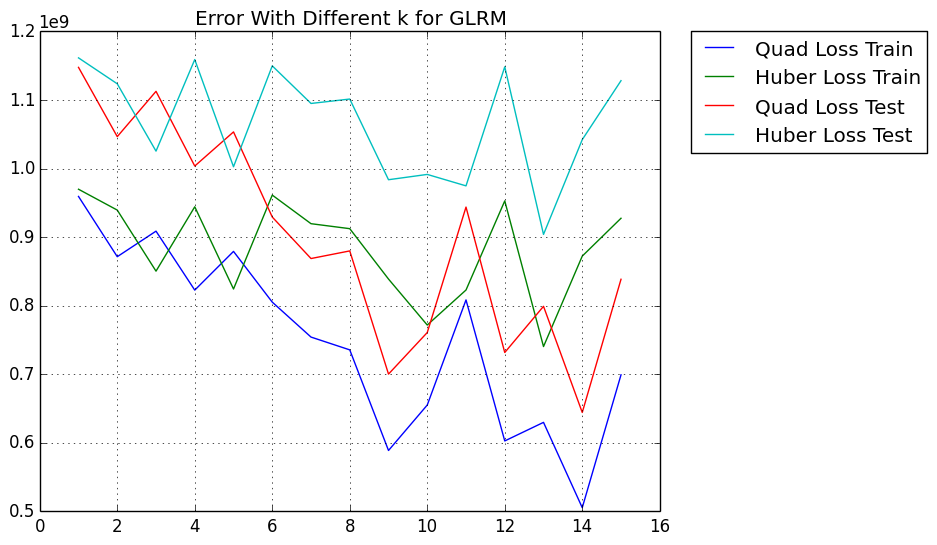

In [199]:
PyPlot.plot(1:15,errorMat[:,1],label = "Quad Loss Train");
PyPlot.plot(1:15,errorMat[:,2],label = "Huber Loss Train");
PyPlot.plot(1:15,testsetErr[:,1],label = "Quad Loss Test");
PyPlot.plot(1:15,testsetErr[:,2],label = "Huber Loss Test")
PyPlot.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
PyPlot.grid("on")
PyPlot.title("Error With Different k for GLRM");

In [173]:
include("proxgrad.jl")

proxgrad_const (generic function with 1 method)

In [ ]:
data = join(training, temperature, on = :Month, kind = :left)

In [81]:
W

,Text_General_Code,w1
1,Theft,0.05858317967127821
2,All_Other_Offenses,0.12107563861771609
3,Other_Assaults,0.019349355707360256
4,Vandalism,-0.14819883244923027
5,Narcotic,-0.2599790292461487
6,Burglary,0.17386736621683113
7,Fraud,0.19067320045818947
8,Retrieving,0.02350761325106327
9,Robbery,-0.013123464601392056
10,Aggravated_Assault,-0.003083924940537292


In [90]:
tail(fitdata)

,Month,Text_General_Code,x1,Year,Unemployment,Child_mortality,hospital_ambulization_rate,Cancer_mortality,Days_good_air_quality,Homicide_mortality_rate,Suicide_mortality_rate,Theft,All_Other_Offenses,Other_Assaults,Vandalism,Narcotic,Burglary,Fraud,Retrieving,Robbery,Aggravated_Assault,Driving_Under_The_Influcence,Disorderly_Conduct,Weapon_Violations,Other_Sex_Offenses,Prostitution,Rape,Drinking_Violation,Vagrancy_Loitering,Arson,Forgery_Counterfeiting,Embezzlement,Homicide,Offenses_Against_Family_Children,Gambling_Violations,Receiving_Stolen_Property,Temperature_Max,Temperature_Min,Temperature_Avg,Temperature_Departure,HDD,CDD,Precipitation,New_Snow,Snow_Depth,Month_Number,Avg,deseasonalized
1,2009-12-01T00:00:00,Fraud,819,2009,0.097,77.2,1476.9,219.1,185,18.0,10.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,43.32258065,29.38709677,36.35483871,-1.090322581,28.41935484,0.0,0.285806452,0.777419355,2.677419355,12,768.8333333333334,1.0652503793626706
2,2010-11-01T00:00:00,Forgery and Counterfeiting,43,2010,0.106,78.8,1348.0,203.3,175,18.6,9.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,56.23333333,40.23333333,48.23333333,0.633333333,16.5,0.0,0.058666667,0.0,0.0,11,46.333333333333336,0.9280575539568345
3,2009-06-01T00:00:00,Homicide,27,2009,0.097,77.2,1476.9,219.1,185,18.0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,78.93333333,63.23333333,71.08333333,-2.166666667,0.5,6.833333333,0.159666667,0.0,0.0,6,32.333333333333336,0.8350515463917525
4,2008-10-01T00:00:00,Narcotic / Drug Law Violations,1151,2008,0.071,82.7,1541.7,211.8,128,19.8,11.7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65.48387097,47.64516129,56.56451613,-0.932258065,8.838709677,0.612903226,0.051290323,0.0,0.0,10,1154.6666666666667,0.996824480369515
5,2006-08-01T00:00:00,Arson,50,2006,0.062,87.5,1608.9,228.1,154,24.4,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,86.48387097,69.74193548,78.11290323,1.525806452,0.0,13.32258065,0.126774194,0.0,0.0,8,50.333333333333336,0.9933774834437086
6,2009-03-01T00:00:00,Rape,75,2009,0.097,77.2,1476.9,219.1,185,18.0,10.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,52.25806452,35.03225806,43.64516129,0.090322581,21.06451613,0.0,0.052258065,0.290322581,0.483870968,3,81.33333333333333,0.9221311475409837


In [99]:
W

,Text_General_Code,w1
1,Theft,1.3713426660376542
2,All_Other_Offenses,-2.1610488561506136
3,Other_Assaults,0.4976971381553609
4,Vandalism,1.6424976771660746
5,Narcotic,0.5274353859503829
6,Burglary,-1.1272715887008053
7,Fraud,0.5842465203637683
8,Retrieving,1.4530806823194777
9,Robbery,0.3379725850161879
10,Aggravated_Assault,1.2887850732103125


In [106]:
[train[symbol("w$i")].data for j = 1:3]

LoadError: LoadError: UndefVarError: train not defined
while loading In[106], in expression starting on line 1

In [124]:
zeros(3,2)[1,:] = [2,3]

2-element Array{Int64,1}:
 2
 3